In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import pickle as pkl

# Data Preparation

In [3]:
data_path  = 'D:\\Git\\Telecom_Churn_Modeling\\Data\\Telecom_Customer_Churn.csv'
churn_df = pd.read_csv(data_path)

In [4]:
churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Data Cleaning 

Checking for Missing Data

In [5]:
" " in churn_df

False

In [6]:
'' in churn_df

False

In [7]:
churn_df['TotalCharges'] = churn_df["TotalCharges"].replace(" ",np.nan)

In [8]:
churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
churn_df = churn_df.dropna()

In [10]:
churn_df['TotalCharges'] = churn_df['TotalCharges'].astype('float')

In [11]:
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Exploration

In [12]:
print("Number of Rows: ", churn_df.shape[0])
print("Number of Columns: ", churn_df.shape[1])
print("\nNumber of Features: {} \n{}".format(len(churn_df.columns),list(churn_df.columns)))

Number of Rows:  7032
Number of Columns:  21

Number of Features: 21 
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [13]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
churn_df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [15]:
def pie_plots(columns):
    fig = plt.figure(figsize = (20,20))
    for i in range(len(columns)):
        print('\n{}'.format(columns[i]))
        unique_items = churn_df[columns[i]].unique()
        print(unique_items)

        sizes = []
        for item in unique_items:
            sizes.append(len(churn_df.loc[churn_df[columns[i]]== item]))

        for k in range(len(unique_items)):
            print('{} : {}'.format(unique_items[k],sizes[k]))
        ax = plt.subplot(5, 4, i+1)
        ax.set_title(columns[i])
        ax.pie(sizes, labels = unique_items)
    plt.show()
    return
    
    


gender
['Female' 'Male']
Female : 3483
Male : 3549

SeniorCitizen
[0 1]
0 : 5890
1 : 1142

Partner
['Yes' 'No']
Yes : 3393
No : 3639

Dependents
['No' 'Yes']
No : 4933
Yes : 2099

PhoneService
['No' 'Yes']
No : 680
Yes : 6352

MultipleLines
['No phone service' 'No' 'Yes']
No phone service : 680
No : 3385
Yes : 2967

InternetService
['DSL' 'Fiber optic' 'No']
DSL : 2416
Fiber optic : 3096
No : 1520

OnlineSecurity
['No' 'Yes' 'No internet service']
No : 3497
Yes : 2015
No internet service : 1520

OnlineBackup
['Yes' 'No' 'No internet service']
Yes : 2425
No : 3087
No internet service : 1520

DeviceProtection
['No' 'Yes' 'No internet service']
No : 3094
Yes : 2418
No internet service : 1520

TechSupport
['No' 'Yes' 'No internet service']
No : 3472
Yes : 2040
No internet service : 1520

StreamingTV
['No' 'Yes' 'No internet service']
No : 2809
Yes : 2703
No internet service : 1520

StreamingMovies
['No' 'Yes' 'No internet service']
No : 2781
Yes : 2731
No internet service : 1520

Contract

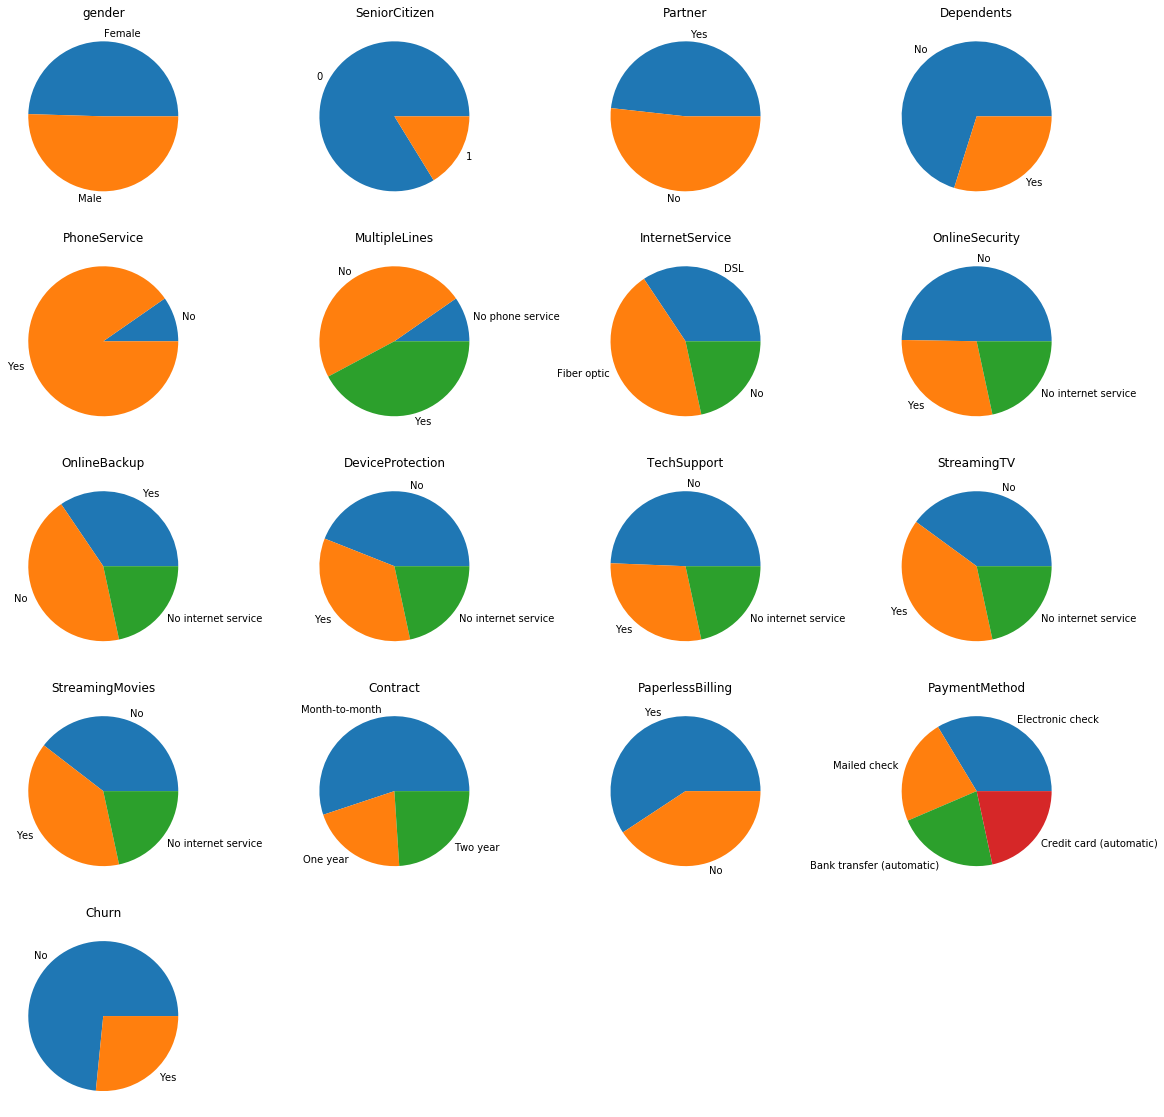

In [16]:
pie_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',  'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
pie_plots(pie_cols)

(array([1724.,  735.,  561.,  538.,  473.,  444.,  452.,  495.,  501.,
        1109.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 10 Patch objects>)

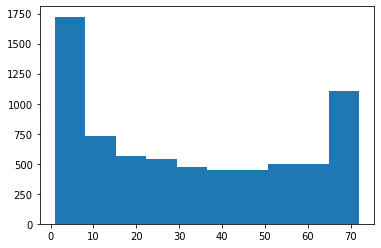

In [17]:
plt.hist(churn_df['tenure'])

(array([1600.,  191.,  365.,  637.,  472.,  894.,  952.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 10 Patch objects>)

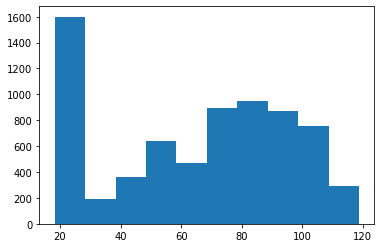

In [18]:
plt.hist(churn_df['MonthlyCharges'])

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <a list of 10 Patch objects>)

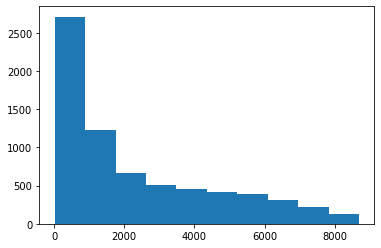

In [19]:
plt.hist(churn_df['TotalCharges'])

Handling categorical features

In [20]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',  'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in cols:
    dummies = pd.get_dummies(churn_df[col], drop_first= False)
    dummies = dummies.add_prefix('{}_'.format(col))
    churn_df.drop(col,inplace = True,axis = 1)
    churn_df = churn_df.join(dummies)

In [21]:
churn_df['Churn'] = churn_df['Churn'].replace({'Yes':1, 'No': 0})

In [22]:
churn_df.drop('customerID' , axis = 1, inplace = True)

In [23]:
churn_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


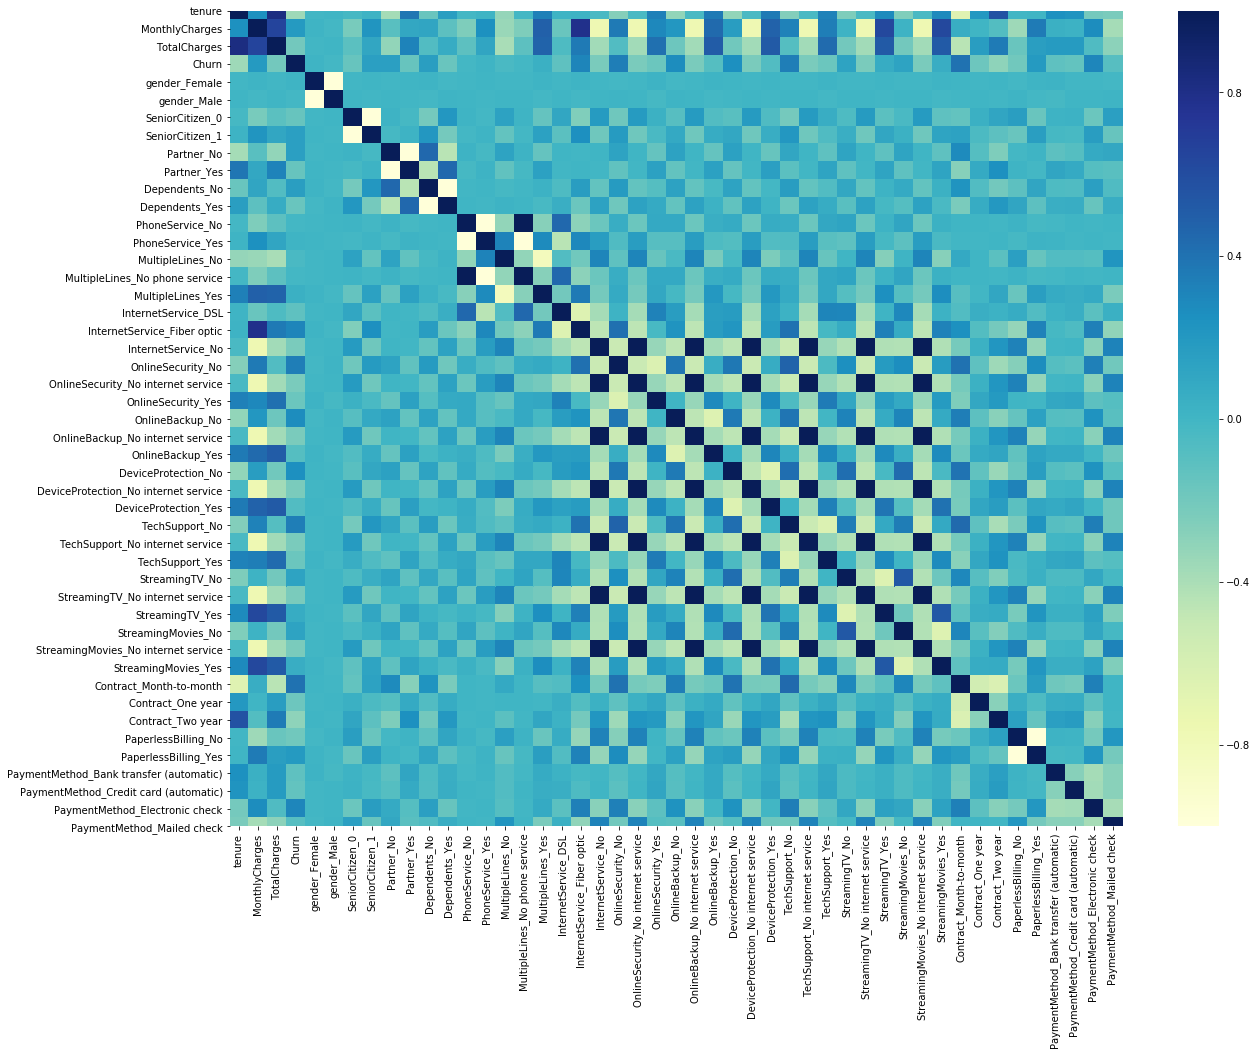

In [24]:
corr=churn_df.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=False,cmap="YlGnBu")

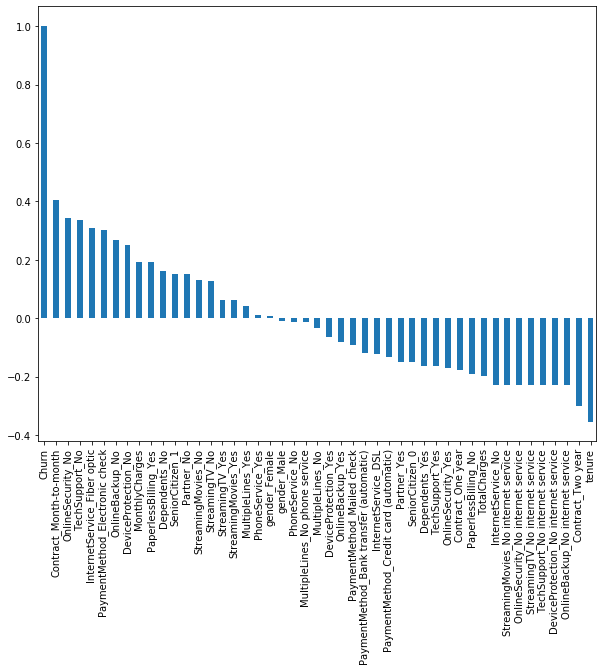

In [25]:
plt.figure(figsize = (10,8))
corr['Churn'].sort_values(ascending = False).plot(kind='bar')

In [26]:
churn_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [27]:
churn_df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785,0.495307,0.504693,0.837600,0.162400,0.517491,0.482509,...,0.388367,0.551052,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100
std,24.545260,30.085974,2266.771362,0.441782,0.500014,0.500014,0.368844,0.368844,0.499729,0.499729,...,0.487414,0.497422,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637
min,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
churn_df.to_csv('D:\\Git\\Telecom_Churn_Modeling\\Data\\cleaned_data.csv')

In [2]:
churn_df = pd.read_csv("D:\\Git\\Telecom_Churn_Modeling\\Data\\cleaned_data.csv")

### Modeling

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
cols = list(churn_df.columns)
cols.remove('Churn')
Y = churn_df['Churn']
X = churn_df[cols]
X = X.drop('Unnamed: 0',axis = 1)

In [5]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

In [7]:
def get_results(y_test,y_hat,y_prob):
    conf_matrix = confusion_matrix(y_test,y_hat)
    print ("\n Confusion Matrix : \n",conf_matrix)
    #print ("\n Classification report : \n",classification_report(y_test,y_hat))
    print ("Accuracy   Score : ",accuracy_score(y_test,y_hat))
    print ("Precision : ",precision_score(y_test,y_hat))
    print("Recall :",recall_score(y_test,y_hat))
    print("F1 Score:",f1_score(y_test,y_hat))
    #confusion matrix
    #roc_auc_score
    model_roc_auc = roc_auc_score(y_test,y_hat) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [34]:
lrc = LogisticRegression(random_state = 101)
params = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


grid_lr = GridSearchCV(estimator = lrc,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs = -1)
grid_lr.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished
C:\Users\mayan\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=101, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [35]:
print(grid_lr.best_estimator_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=101, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)



 Confusion Matrix : 
 [[1199  130]
 [ 194  235]]
Accuracy   Score :  0.8156996587030717
Precision :  0.6438356164383562
Recall : 0.5477855477855478
F1 Score: 0.5919395465994963
Area under curve :  0.7249838197919461 



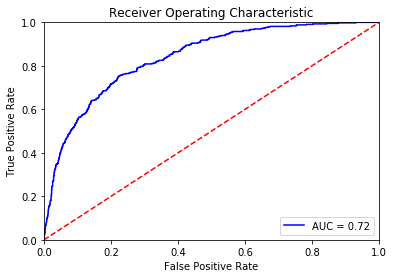

In [36]:
best_lr = grid_lr.best_estimator_
pkl.dump(best_lr, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\LogisticRegressionModel', 'wb'))
y_hat_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)
get_results(y_test,y_hat_lr,y_prob_lr)

### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier


In [38]:
dtc = DecisionTreeClassifier(random_state = 101)

params = {
    'criterion' : ['gini','entropy'],
    'splitter': ['best','random'],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_dtc = GridSearchCV(estimator = dtc,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs = -1)

grid_dtc.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.5s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=101,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
            

In [39]:
print(grid_dtc.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')



 Confusion Matrix : 
 [[1086  243]
 [ 224  205]]
Accuracy   Score :  0.7343572241183163
Precision :  0.4575892857142857
Recall : 0.47785547785547783
F1 Score: 0.4675028506271379
Area under curve :  0.6475056170315765 



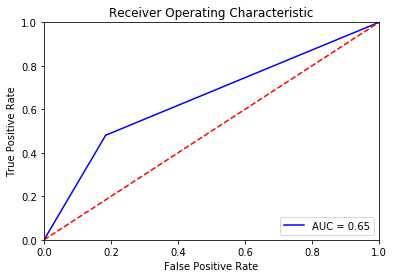

In [40]:
best_dt = grid_dtc.best_estimator_
pkl.dump(best_dt, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\DecisionTreeModel', 'wb'))
y_hat_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)
get_results(y_test,y_hat_dt,y_prob_dt)

### KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knc = KNeighborsClassifier()
params = {
    'n_neighbors' : range(5, 25,2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_knc = GridSearchCV(estimator = knc,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs = -1)
grid_knc.fit(X_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   26.6s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(5, 25, 2),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [43]:
best_knc = grid_knc.best_estimator_
print(best_knc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')


In [44]:
pkl.dump(best_knc, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\KNeighborClassifierModel', 'wb'))
y_hat_knc = best_knc.predict(X_test)
y_prob_knc = best_knc.predict_proba(X_test)


 Confusion Matrix : 
 [[1224  105]
 [ 261  168]]
Accuracy   Score :  0.7918088737201365
Precision :  0.6153846153846154
Recall : 0.3916083916083916
F1 Score: 0.47863247863247865
Area under curve :  0.6563008097996812 



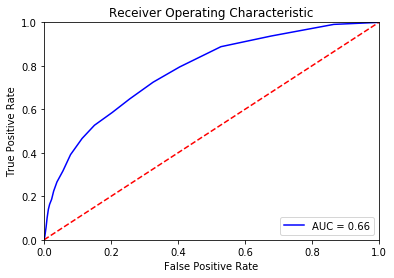

In [45]:
get_results(y_test,y_hat_knc,y_prob_knc)

### SVC

In [46]:
from sklearn.svm import SVC

In [49]:
svc = SVC(probability = True)

params = {
    'class_weight': [None, 'balanced']
}

grid_svc = GridSearchCV(estimator = svc,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 3,
                       scoring = 'accuracy',
                       cv = 10)

grid_svc.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:  2.6min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.6min finished
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)


 Confusion Matrix : 
 [[1246   83]
 [ 276  153]]
Accuracy   Score :  0.7957906712172924
Precision :  0.6483050847457628
Recall : 0.35664335664335667
F1 Score: 0.46015037593984964
Area under curve :  0.6470951922419191 



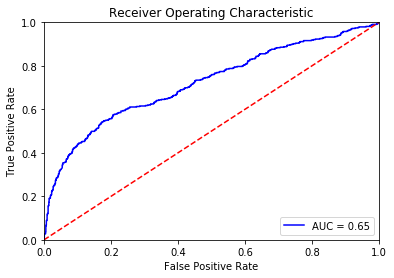

In [56]:
best_svc = grid_svc.best_estimator_
pkl.dump(best_svc, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\SVModel', 'wb'))
y_hat_svc  = best_svc.predict(X_test)
y_prob_svc = best_svc.predict_proba(X_test)
get_results(y_test,y_hat_svc,y_prob_svc)

### Neural Network Classifier

In [51]:
from sklearn.neural_network import MLPClassifier

In [52]:
nnc = MLPClassifier()

params = {
    'activation' : ['logistic', 'relu', 'tanh'],
    'solver' : ['adam' , 'sgd'],
    'early_stopping': [True]
}

In [53]:
grid_nn = GridSearchCV(estimator = nnc,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 3,
                       scoring = 'accuracy',
                       cv = 10)
grid_nn.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   54.6s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'tanh']

In [54]:
best_nn = grid_nn.best_estimator_
print(best_nn)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)



 Confusion Matrix : 
 [[1227  102]
 [ 231  198]]
Accuracy   Score :  0.810580204778157
Precision :  0.66
Recall : 0.46153846153846156
F1 Score: 0.5432098765432098
Area under curve :  0.6923945129362737 



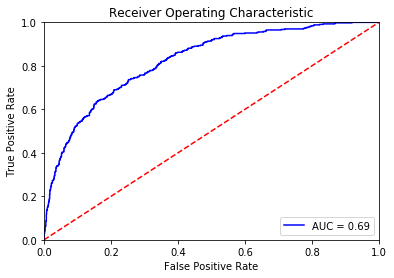

In [55]:
pkl.dump(best_nn, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\NNModel', 'wb'))
y_hat_nn  = best_nn.predict(X_test)
y_prob_nn = best_nn.predict_proba(X_test)
get_results(y_test,y_hat_nn,y_prob_nn)

### Ensemble Methods

#### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier(random_state = 101)

params = {
        'criterion' : ['gini', 'entropy'],
        'max_features' : ['auto', 'log2' , 'sqrt'],
        'oob_score' :[True]
}

grid_rfc = grid_svc = GridSearchCV(estimator = rfc,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 3,
                       scoring = 'accuracy',
                       cv = 10)
grid_rfc.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   54.5s finished
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=101,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'

In [59]:
best_rfc = grid_rfc.best_estimator_
print(best_rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=101, verbose=0,
                       warm_start=False)



 Confusion Matrix : 
 [[1200  129]
 [ 241  188]]
Accuracy   Score :  0.7895335608646189
Precision :  0.5930599369085173
Recall : 0.4382284382284382
F1 Score: 0.5040214477211796
Area under curve :  0.6705814877372439 



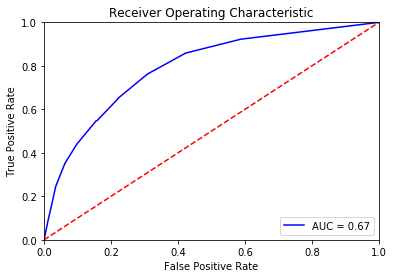

In [60]:
pkl.dump(best_rfc, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\RFCModel', 'wb'))
y_hat_rfc  = best_rfc.predict(X_test)
y_prob_rfc = best_rfc.predict_proba(X_test)
get_results(y_test,y_hat_rfc,y_prob_rfc)

#### AdaBoost

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
abc = AdaBoostClassifier(random_state = 101, n_estimators = 100)

abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=101)


 Confusion Matrix : 
 [[1210  119]
 [ 196  233]]
Accuracy   Score :  0.8208191126279863
Precision :  0.6619318181818182
Recall : 0.5431235431235432
F1 Score: 0.5966709346991038
Area under curve :  0.7267912674233216 



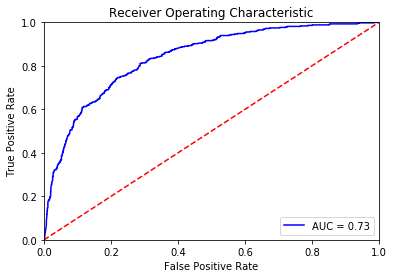

In [66]:
pkl.dump(abc, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\AdaBoostModel', 'wb'))
y_hat_abc  = abc.predict(X_test)
y_prob_abc = abc.predict_proba(X_test)
get_results(y_test,y_hat_abc,y_prob_abc)

#### Gradient Boost Classifier

In [9]:
 from sklearn.ensemble import GradientBoostingClassifier

In [10]:
gbc = GradientBoostingClassifier(random_state = 101)

params = {
    'loss' :['deviance', 'exponential'],
    'learning_rate':[0.001,0.01,0.1],
    'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'mse', 'mae']
}

grid_gbc = GridSearchCV(estimator = gbc,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 3,
                       scoring = 'accuracy',
                       cv = 10)
grid_gbc.fit(X_train,y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 96.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 130.1min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=3)

In [11]:
best_gbc = grid_gbc.best_estimator_
print(best_gbc)

GradientBoostingClassifier(loss='exponential', n_estimators=50,
                           random_state=101)



 Confusion Matrix : 
 [[1214  115]
 [ 210  219]]
Accuracy   Score :  0.8151308304891922
Precision :  0.655688622754491
Recall : 0.5104895104895105
F1 Score: 0.5740498034076016
Area under curve :  0.7119791420017153 



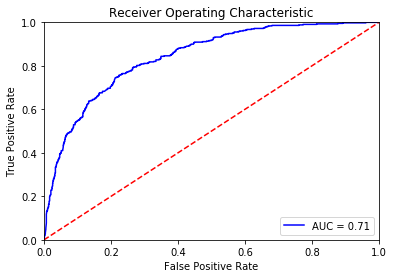

In [12]:
pkl.dump(best_gbc, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\GBCModel', 'wb'))
y_hat_gbc  = best_gbc.predict(X_test)
y_prob_gbc = best_gbc.predict_proba(X_test)
get_results(y_test,y_hat_gbc,y_prob_gbc)

## Handling Imbalance

In [10]:
print("Class proportions:")
print("Churn:",len(churn_df.loc[churn_df['Churn'] == 1]))
print("Non-Churn:",len(churn_df.loc[churn_df['Churn'] == 0]))

Class proportions:
Churn: 1869
Non-Churn: 5163


### SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [15]:
print("Class proportions:")
print("Churn:",len(Y.loc[Y== 1]))
print("Non-Churn:",len(Y.loc[Y == 0]))

Class proportions:
Churn: 5163
Non-Churn: 5163


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

### Ada Boost with Oversampling using SMOTE

In [19]:
oabc = AdaBoostClassifier(random_state = 101, n_estimators = 100)

oabc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=101)


 Confusion Matrix : 
 [[1100  185]
 [ 177 1120]]
Accuracy   Score :  0.8597986057319907
Precision :  0.8582375478927203
Recall : 0.8635312259059368
F1 Score: 0.8608762490392007
Area under curve :  0.859781177155303 



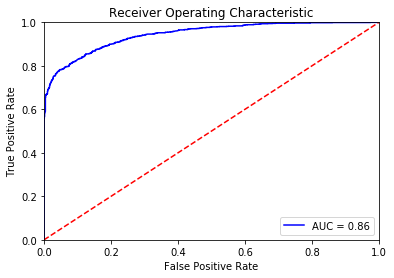

In [21]:
pkl.dump(oabc, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\OversampledAdaBoostModel', 'wb'))
y_hat_oabc  = oabc.predict(X_test)
y_prob_oabc = oabc.predict_proba(X_test)
get_results(y_test,y_hat_oabc,y_prob_oabc)

### Logistic Regression with SMOTE

In [22]:
olrc = LogisticRegression(random_state = 101)
params = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


grid_olr = GridSearchCV(estimator = olrc,
                        param_grid = params,
best_lr = grid_lr.best_estimator_
pkl.dump(best_lr, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\LogisticRegressionModel', 'wb'))
y_hat_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)
get_results(y_test,y_hat_lr,y_prob_lr)                        scoring = 'accuracy', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs = -1)
grid_olr.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.5s finished
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=101), n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)


 Confusion Matrix : 
 [[1136  149]
 [ 200 1097]]
Accuracy   Score :  0.864833462432223
Precision :  0.8804173354735152
Recall : 0.8457979953739398
F1 Score: 0.8627605190719622
Area under curve :  0.8649223439904719 



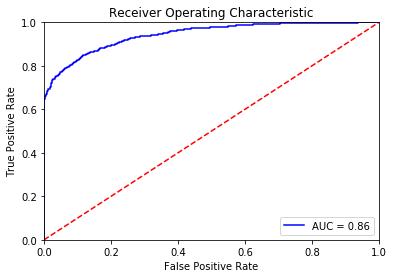

In [23]:
best_olr = grid_olr.best_estimator_
pkl.dump(best_olr, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\OversampledLogisticRegressionModel', 'wb'))
y_hat_olr = best_olr.predict(X_test)
y_prob_olr = best_olr.predict_proba(X_test)
get_results(y_test,y_hat_olr,y_prob_olr)

#### Using Gradient boost classifier with SMOTE

In [23]:
ogbc = GradientBoostingClassifier(random_state = 101)

params = {
    'loss' :['deviance', 'exponential'],
    'learning_rate':[0.001,0.01,0.1],
    'n_estimators':[50,100,200]
}

grid_ogbc = GridSearchCV(estimator = ogbc,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 3,
                       scoring = 'accuracy',
                       cv = 10)
grid_ogbc.fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   52.6s finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=3)

In [24]:
best_ogbc = grid_ogbc.best_estimator_
print(best_ogbc)

GradientBoostingClassifier(loss='exponential', random_state=101)



 Confusion Matrix : 
 [[1109  176]
 [ 175 1122]]
Accuracy   Score :  0.8640588690937258
Precision :  0.864406779661017
Recall : 0.8650732459521974
F1 Score: 0.8647398843930635
Area under curve :  0.8640541327037252 



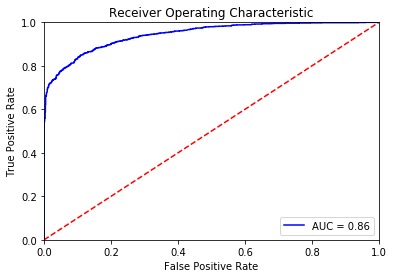

In [25]:
pkl.dump(best_ogbc, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\OverSampledGBCModel', 'wb'))
y_hat_ogbc  = best_ogbc.predict(X_test)
y_prob_ogbc = best_ogbc.predict_proba(X_test)
get_results(y_test,y_hat_ogbc,y_prob_ogbc)

#### XGBoost with SMOTE

In [30]:
from xgboost import XGBClassifier

In [31]:
xgbc = XGBClassifier(random_state = 101)

params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,5)]
}

grid_xgbc = GridSearchCV(estimator = xgbc,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 3,
                       scoring = 'accuracy',
                       cv = 10)
grid_xgbc.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.0min finished


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=101,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [32]:
best_xgbc = grid_xgbc.best_estimator_
print(best_xgbc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)



 Confusion Matrix : 
 [[1130  155]
 [ 191 1106]]
Accuracy   Score :  0.8659953524399691
Precision :  0.8770816812053925
Recall : 0.8527370855821126
F1 Score: 0.8647380766223612
Area under curve :  0.8660572587443637 



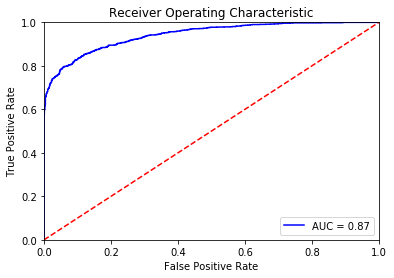

In [33]:
pkl.dump(best_xgbc, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\OverSampledXGBCModel', 'wb'))
y_hat_xgbc  = best_xgbc.predict(X_test)
y_prob_xgbc = best_xgbc.predict_proba(X_test)
get_results(y_test,y_hat_xgbc,y_prob_xgbc)

#### Light GBM

In [35]:
from lightgbm import LGBMClassifier

In [36]:
lgbm = LGBMClassifier(random_state = 101, silent = False)

params = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }

grid_lgbm = GridSearchCV(estimator = lgbm,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 3,
                       scoring = 'accuracy',
                       cv = 10)
grid_lgbm.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.0min finished


GridSearchCV(cv=10, estimator=LGBMClassifier(random_state=101, silent=False),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [25, 50, 75], 'n_estimators': [200],
                         'num_leaves': [300, 900, 1200]},
             scoring='accuracy', verbose=3)

In [37]:
best_lgbm = grid_lgbm.best_estimator_
print(best_lgbm)

LGBMClassifier(learning_rate=0.05, max_depth=25, n_estimators=200,
               num_leaves=300, random_state=101, silent=False)



 Confusion Matrix : 
 [[1113  172]
 [ 209 1088]]
Accuracy   Score :  0.8524399690162665
Precision :  0.8634920634920635
Recall : 0.8388589051657671
F1 Score: 0.8509972624168948
Area under curve :  0.8525033825439732 



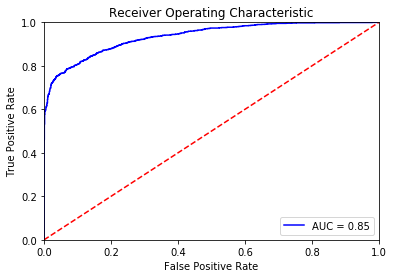

In [38]:
pkl.dump(best_lgbm, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\OverSampledLGBMModel', 'wb'))
y_hat_lgbm  = best_lgbm.predict(X_test)
y_prob_lgbm = best_lgbm.predict_proba(X_test)
get_results(y_test,y_hat_lgbm,y_prob_lgbm)

#### CatBoost SMOTE

In [39]:
from catboost import CatBoostClassifier

In [40]:
cbc = CatBoostClassifier(random_state = 101)

params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}

grid_cbc = GridSearchCV(estimator = cbc,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 3,
                       scoring = 'accuracy',
                       cv = 10)
grid_cbc.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 13.3min finished


0:	learn: 0.6752683	total: 144ms	remaining: 43.2s
1:	learn: 0.6600432	total: 148ms	remaining: 22s
2:	learn: 0.6456685	total: 151ms	remaining: 14.9s
3:	learn: 0.6302414	total: 153ms	remaining: 11.4s
4:	learn: 0.6162236	total: 156ms	remaining: 9.22s
5:	learn: 0.6055298	total: 159ms	remaining: 7.8s
6:	learn: 0.5934203	total: 162ms	remaining: 6.78s
7:	learn: 0.5854535	total: 165ms	remaining: 6.03s
8:	learn: 0.5783674	total: 168ms	remaining: 5.44s
9:	learn: 0.5688811	total: 172ms	remaining: 4.99s
10:	learn: 0.5579322	total: 176ms	remaining: 4.63s
11:	learn: 0.5494135	total: 180ms	remaining: 4.31s
12:	learn: 0.5415606	total: 186ms	remaining: 4.1s
13:	learn: 0.5341912	total: 189ms	remaining: 3.86s
14:	learn: 0.5261852	total: 192ms	remaining: 3.65s
15:	learn: 0.5199806	total: 195ms	remaining: 3.46s
16:	learn: 0.5141686	total: 198ms	remaining: 3.3s
17:	learn: 0.5084750	total: 201ms	remaining: 3.15s
18:	learn: 0.5031061	total: 204ms	remaining: 3.02s
19:	learn: 0.4948482	total: 207ms	remaining: 2

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001DDCB8B9908>,
             n_jobs=-1,
             param_grid={'depth': [4, 7, 10], 'iterations': [300],
                         'l2_leaf_reg': [1, 4, 9],
                         'learning_rate': [0.03, 0.1, 0.15]},
             scoring='accuracy', verbose=3)

In [41]:
best_cbc = grid_cbc.best_estimator_
print(best_cbc)


 Confusion Matrix : 
 [[1121  164]
 [ 190 1107]]
Accuracy   Score :  0.8628969790859798
Precision :  0.8709677419354839
Recall : 0.8535080956052429
F1 Score: 0.8621495327102804
Area under curve :  0.8629408182306371 



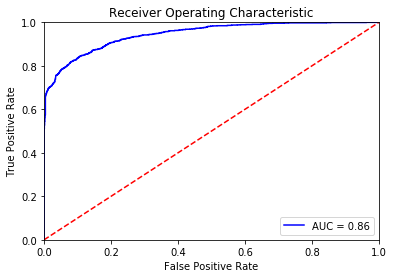

In [42]:
pkl.dump(best_cbc, open('D:\\Git\\Telecom_Churn_Modeling\\Data\\OverSampledCatBoostModel', 'wb'))
y_hat_cbc  = best_cbc.predict(X_test)
y_prob_cbc = best_cbc.predict_proba(X_test)
get_results(y_test,y_hat_cbc,y_prob_cbc)